In [159]:
# import all the things
# API Key: 46b582e264cd589807d0c7d4fef9e732
# url: https://api.themoviedb.org/3

import json
import csv
import pandas as pd
import requests
import tmdbsimple as tmdb
import timeit
import numpy as np
import cpi
import matplotlib.pyplot as plt

tmdb.API_KEY = '46b582e264cd589807d0c7d4fef9e732'
API_KEY = '46b582e264cd589807d0c7d4fef9e732'
tmdb_url = 'https://api.themoviedb.org/3'

In [127]:
tmdb_request = requests.get('https://api.themoviedb.org/3/movie/76341?api_key={}'.format(API_KEY))
tmdb_request.status_code

200

In [128]:
tmdb_df = pd.read_csv('./tmdb_data_final.csv')

In [129]:
tmdb_df

,adult,belongs_to_collection,collection_name,budget,genres,id,original_language,original_title,popularity,release_date,...,vote_count,date_grp,cpi_index,cpi_current,inflation_rate,budget_diff,budget_adj,revenue_diff,revenue_adj,original_language_full
0,False,1066568,Terror Train Collection,0.0,Horror,1054624,en,Terror Train 2,9.43,12/31/2022,...,1,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,English
1,False,1066568,Terror Train Collection,0.0,Mystery,1054624,en,Terror Train 2,9.43,12/31/2022,...,1,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,English
2,False,579873,Major Grom Collection,0.0,Action,984317,ru,Гром: Трудное детство,3.33,12/30/2022,...,3,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,Russian
3,False,579873,Major Grom Collection,0.0,Crime,984317,ru,Гром: Трудное детство,3.33,12/30/2022,...,3,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,Russian
4,False,579873,Major Grom Collection,0.0,Mystery,984317,ru,Гром: Трудное детство,3.33,12/30/2022,...,3,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,Russian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35778,False,774205,Lepain,0.0,no_genre,429087,de,"Lepain, der Kampf mit dem Meisterdetektiv John...",0.60,1/2/1914,...,0,14-Jan,10.000,296.797,0.966307,0.0,0.0,0.0,0.0,German
35779,False,857532,Stuart Webbs,0.0,no_genre,294052,de,Stuart Webbs: Der Mann im Keller,0.60,1/2/1914,...,0,14-Jan,10.000,296.797,0.966307,0.0,0.0,0.0,0.0,German
35780,False,774205,Lepain,0.0,no_genre,429086,de,"Lepain, der König der Unschuldigen - 1. Teil",0.60,1/1/1914,...,0,14-Jan,10.000,296.797,0.966307,0.0,0.0,0.0,0.0,German
35781,False,1065208,Ein Ausgestoßener,0.0,Drama,920792,de,Ein Ausgestoßener: 1. Teil,0.60,3/14/1913,...,0,13-Mar,9.800,296.797,0.966981,0.0,0.0,0.0,0.0,German


In [132]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35783 entries, 0 to 35782
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   adult                   35783 non-null  bool          
 1   belongs_to_collection   35783 non-null  int64         
 2   collection_name         35783 non-null  object        
 3   budget                  35783 non-null  float64       
 4   genres                  35783 non-null  object        
 5   id                      35783 non-null  int64         
 6   original_language       35783 non-null  object        
 7   original_title          35783 non-null  object        
 8   popularity              35783 non-null  float64       
 9   release_date            35783 non-null  datetime64[ns]
 10  revenue                 35783 non-null  float64       
 11  runtime                 35783 non-null  int64         
 12  status                  35783 non-null  object

In [131]:
# convert release_date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [133]:
# How many unique movies are in the list?
# How many unique collections are in the list?
# There are 5035 collections, 20 genres, 16425 movies
tmdb_df.nunique()

adult                         1
belongs_to_collection      5035
collection_name            5024
budget                      683
genres                       20
id                        16425
original_language            67
original_title            16316
popularity                 3087
release_date              10332
revenue                    2561
runtime                     187
status                        1
title                     16293
vote_average                601
vote_count                 1892
date_grp                   1106
cpi_index                   795
cpi_current                   1
inflation_rate              795
budget_diff                2774
budget_adj                 2780
revenue_diff               2718
revenue_adj                2720
original_language_full       66
dtype: int64

In [134]:
# List of all genres
tmdb_df.genres.unique()

array(['Horror', 'Mystery', 'Action', 'Crime', 'Comedy', 'Family',
       'Adventure', 'Drama', 'Thriller', 'Animation', 'Fantasy',
       'Science Fiction', 'TV Movie', 'Documentary', 'Music', 'Romance',
       'History', 'War', 'no_genre', 'Western'], dtype=object)

In [135]:
# count of each genre
tmdb_df.genres.value_counts()

Comedy             5431
Drama              3845
Action             3839
Adventure          2372
Horror             2339
Crime              2126
Thriller           2110
Family             2055
Animation          1942
Science Fiction    1477
Romance            1462
Fantasy            1424
Mystery            1241
TV Movie           1074
no_genre            795
Documentary         670
Western             534
Music               370
History             351
War                 326
Name: genres, dtype: int64

In [136]:
# this doesn't count unique values
tmdb_df.describe()

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,cpi_index,cpi_current,inflation_rate,budget_diff,budget_adj,revenue_diff,revenue_adj
count,3.578300e+04,3.578300e+04,3.578300e+04,35783.00000,3.578300e+04,35783.000000,35783.000000,35783.000000,35783.000000,3.578300e+04,35783.000000,3.578300e+04,3.578300e+04,3.578300e+04,3.578300e+04
mean,4.814322e+05,7.564331e+06,2.505784e+05,13.42427,3.065230e+07,94.358690,5.485135,578.084873,169.109430,2.967970e+02,0.430219,2.072868e+06,9.637198e+06,8.753161e+06,3.940546e+07
std,3.280383e+05,2.879374e+07,2.612382e+05,135.33379,1.341677e+08,23.665585,2.233172,2131.347585,79.556483,1.147685e-10,0.268050,7.346186e+06,3.546111e+07,3.545715e+07,1.659940e+08
min,1.000000e+01,0.000000e+00,1.100000e+01,0.60000,0.000000e+00,40.000000,0.000000,0.000000,9.800000,2.967970e+02,-0.004094,-7.698865e+05,0.000000e+00,-2.525228e+06,0.000000e+00
25%,1.676130e+05,0.000000e+00,3.773000e+04,1.39000,0.000000e+00,83.000000,5.000000,4.000000,113.800000,2.967970e+02,0.204443,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.491040e+05,0.000000e+00,1.392930e+05,3.42000,0.000000e+00,92.000000,6.090000,18.000000,189.500000,2.967970e+02,0.361516,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.543810e+05,0.000000e+00,4.141785e+05,10.29000,0.000000e+00,104.000000,6.870000,119.000000,236.119000,2.967970e+02,0.616573,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.073290e+06,4.600000e+08,1.072197e+06,9725.00000,2.920357e+09,240.000000,10.000000,28965.000000,298.012000,2.967970e+02,0.966981,9.069007e+07,4.706901e+08,7.955102e+08,3.715867e+09


In [137]:
# release_date range
date_range = str(tmdb_df['release_date'].dt.date.min()) + ' to ' +str(tmdb_df['release_date'].dt.date.max())
date_range

'1913-01-01 to 2022-12-31'

In [138]:
# budget_adj grouped by genres
tmdb_df.groupby('genres')['budget_adj'].sum()

genres
Action             6.332096e+10
Adventure          6.180212e+10
Animation          1.650422e+10
Comedy             3.443777e+10
Crime              1.404739e+10
Documentary        9.892366e+07
Drama              1.582742e+10
Family             2.574539e+10
Fantasy            2.945816e+10
History            1.634247e+09
Horror             8.426754e+09
Music              1.596374e+09
Mystery            6.323465e+09
Romance            5.583701e+09
Science Fiction    2.998010e+10
TV Movie           2.681101e+08
Thriller           2.663608e+10
War                2.380638e+09
Western            7.656290e+08
no_genre           1.040553e+07
Name: budget_adj, dtype: float64

In [139]:
# revenue_adj grouped by genres
tmdb_df.groupby('genres')['revenue_adj'].sum()

genres
Action             2.464614e+11
Adventure          2.616784e+11
Animation          7.666359e+10
Comedy             1.455923e+11
Crime              5.279737e+10
Documentary        7.346645e+08
Drama              6.745228e+10
Family             1.044643e+11
Fantasy            1.214094e+11
History            3.504635e+09
Horror             3.541743e+10
Music              6.674940e+09
Mystery            2.621682e+10
Romance            3.217428e+10
Science Fiction    1.203038e+11
TV Movie           3.174129e+07
Thriller           9.810557e+10
War                7.818342e+09
Western            2.320673e+09
no_genre           2.235655e+08
Name: revenue_adj, dtype: float64

In [140]:
# In order to analyze unique values (eg, one movie id per row), we need to drop duplicates.
# We originally exploded movies based on genre. 
# All analyses below represent one row = one movie

tmdb_df_unique = tmdb_df.drop_duplicates(subset=['id'])

In [141]:
tmdb_df_unique.sort_values(by=['belongs_to_collection','id']).head(10)

,adult,belongs_to_collection,collection_name,budget,genres,id,original_language,original_title,popularity,release_date,...,vote_count,date_grp,cpi_index,cpi_current,inflation_rate,budget_diff,budget_adj,revenue_diff,revenue_adj,original_language_full
29758,False,10,Star Wars Collection,11000000.0,Adventure,11,en,Star Wars,85.36,1977-05-25,...,18120,May-77,60.300,296.797,0.796831,8765139.14,1.976514e+07,6.178610e+08,1.393259e+09,English
29044,False,10,Star Wars Collection,18000000.0,Adventure,1891,en,The Empire Strikes Back,27.56,1980-05-20,...,14941,May-80,81.800,296.797,0.724391,13039033.41,3.103903e+07,3.900120e+08,9.284120e+08,English
28238,False,10,Star Wars Collection,32350000.0,Adventure,1892,en,Return of the Jedi,26.43,1983-05-25,...,13757,May-83,99.200,296.797,0.665765,21537491.79,5.388749e+07,3.812835e+08,9.539835e+08,English
20832,False,10,Star Wars Collection,115000000.0,Adventure,1893,en,Star Wars: Episode I - The Phantom Menace,31.76,1999-05-19,...,12828,May-99,166.200,296.797,0.440021,50602448.81,1.656024e+08,4.067194e+08,1.331037e+09,English
19244,False,10,Star Wars Collection,120000000.0,Adventure,1894,en,Star Wars: Episode II - Attack of the Clones,33.35,2002-05-15,...,11645,2-May,179.800,296.797,0.394199,47303847.41,1.673038e+08,2.559920e+08,9.053903e+08,English
17277,False,10,Star Wars Collection,113000000.0,Adventure,1895,en,Star Wars: Episode III - Revenge of the Sith,34.51,2005-05-17,...,12064,5-May,194.400,296.797,0.345007,38985774.79,1.519858e+08,2.932558e+08,1.143256e+09,English
7330,False,10,Star Wars Collection,245000000.0,Adventure,140607,en,Star Wars: The Force Awakens,68.40,2015-12-15,...,17639,15-Dec,236.525,296.797,0.203075,49753333.09,2.947533e+08,4.200042e+08,2.488228e+09,English
4968,False,10,Star Wars Collection,200000000.0,Adventure,181808,en,Star Wars: The Last Jedi,48.23,2017-12-13,...,13629,17-Dec,246.524,296.797,0.169385,33877027.06,2.338770e+08,2.257394e+08,1.558438e+09,English
2676,False,10,Star Wars Collection,250000000.0,Adventure,181812,en,Star Wars: The Rise of Skywalker,53.18,2019-12-18,...,8370,19-Dec,256.974,296.797,0.134176,33543971.13,2.835440e+08,1.441243e+08,1.218269e+09,English
28777,False,84,Indiana Jones Collection,18000000.0,Adventure,85,en,Raiders of the Lost Ark,56.34,1981-06-12,...,10630,Jun-81,90.600,296.797,0.694741,12505335.30,3.050534e+07,2.708975e+08,6.608235e+08,English


In [142]:
# reset index of new df
# using reset_index keeps the prior index as its own column

tmdb_df_unique.reset_index()

,index,adult,belongs_to_collection,collection_name,budget,genres,id,original_language,original_title,popularity,...,vote_count,date_grp,cpi_index,cpi_current,inflation_rate,budget_diff,budget_adj,revenue_diff,revenue_adj,original_language_full
0,0,False,1066568,Terror Train Collection,0.0,Horror,1054624,en,Terror Train 2,9.43,...,1,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,English
1,2,False,579873,Major Grom Collection,0.0,Action,984317,ru,Гром: Трудное детство,3.33,...,3,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,Russian
2,6,False,1068305,Last to leave VC Collection,25000.0,Comedy,1068302,en,"Last to leave VC wins $25,000",1.61,...,0,22-Dec,296.797,296.797,0.000000,0.0,25000.0,0.0,0.0,English
3,7,False,990964,Kiljuset collection,0.0,Family,683379,fi,Kiljuset!,2.52,...,0,22-Dec,296.797,296.797,0.000000,0.0,0.0,0.0,0.0,Finnish
4,9,False,120447,Naval Cadets Collection,4714285.0,Adventure,579845,ru,Гардемарины 1787. Мир,2.33,...,0,22-Dec,296.797,296.797,0.000000,0.0,4714285.0,0.0,0.0,Russian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,35778,False,774205,Lepain,0.0,no_genre,429087,de,"Lepain, der Kampf mit dem Meisterdetektiv John...",0.60,...,0,14-Jan,10.000,296.797,0.966307,0.0,0.0,0.0,0.0,German
16421,35779,False,857532,Stuart Webbs,0.0,no_genre,294052,de,Stuart Webbs: Der Mann im Keller,0.60,...,0,14-Jan,10.000,296.797,0.966307,0.0,0.0,0.0,0.0,German
16422,35780,False,774205,Lepain,0.0,no_genre,429086,de,"Lepain, der König der Unschuldigen - 1. Teil",0.60,...,0,14-Jan,10.000,296.797,0.966307,0.0,0.0,0.0,0.0,German
16423,35781,False,1065208,Ein Ausgestoßener,0.0,Drama,920792,de,Ein Ausgestoßener: 1. Teil,0.60,...,0,13-Mar,9.800,296.797,0.966981,0.0,0.0,0.0,0.0,German


In [178]:
# export new df as csv
tmdb_df_unique.to_csv('tmdb_data_unique.csv')

In [143]:
# sanity check: 

tmdb_df_unique.nunique()

adult                         1
belongs_to_collection      5035
collection_name            5024
budget                      683
genres                       20
id                        16425
original_language            67
original_title            16316
popularity                 3087
release_date              10332
revenue                    2561
runtime                     187
status                        1
title                     16293
vote_average                601
vote_count                 1892
date_grp                   1106
cpi_index                   795
cpi_current                   1
inflation_rate              795
budget_diff                2774
budget_adj                 2780
revenue_diff               2718
revenue_adj                2720
original_language_full       66
dtype: int64

In [144]:
# Summary statistics for budget_adj, revenue_adj, runtime, vote_average, vote_count
sumstats = tmdb_df_unique.describe()
sumstats

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,cpi_index,cpi_current,inflation_rate,budget_diff,budget_adj,revenue_diff,revenue_adj
count,1.642500e+04,1.642500e+04,1.642500e+04,16425.000000,1.642500e+04,16425.000000,16425.000000,16425.000000,16425.000000,1.642500e+04,16425.000000,1.642500e+04,1.642500e+04,1.642500e+04,1.642500e+04
mean,5.083740e+05,5.248207e+06,2.731861e+05,9.815169,2.145856e+07,93.149406,5.109974,426.278721,165.535175,2.967970e+02,0.442261,1.453731e+06,6.701938e+06,6.279473e+06,2.773803e+07
std,3.263695e+05,2.392862e+07,2.726294e+05,86.737856,1.107896e+08,23.855012,2.491888,1818.443373,81.923600,4.848891e-11,0.276026,6.114466e+06,2.947070e+07,2.996499e+07,1.375362e+08
min,1.000000e+01,0.000000e+00,1.100000e+01,0.600000,0.000000e+00,40.000000,0.000000,0.000000,9.800000,2.967970e+02,-0.004094,-7.698865e+05,0.000000e+00,-2.525228e+06,0.000000e+00
25%,2.040800e+05,0.000000e+00,4.434700e+04,1.020000,0.000000e+00,81.000000,4.500000,2.000000,108.000000,2.967970e+02,0.208951,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.745830e+05,0.000000e+00,1.708040e+05,2.490000,0.000000e+00,91.000000,5.910000,11.000000,184.600000,2.967970e+02,0.378026,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.884000e+05,0.000000e+00,4.387030e+05,7.490000,0.000000e+00,103.000000,6.730000,69.000000,234.781000,2.967970e+02,0.636115,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.073290e+06,4.600000e+08,1.072197e+06,9725.000000,2.920357e+09,240.000000,10.000000,28965.000000,298.012000,2.967970e+02,0.966981,9.069007e+07,4.706901e+08,7.955102e+08,3.715867e+09


In [96]:
# export sumstats to import into excel
sumstats.to_csv('sumstats.csv')

In [145]:
# sum budget_adj

tmdb_df_unique.budget_adj.sum()

110079338004.46

In [146]:
# sanity check: sum budget_adj for original df (should be higher)

tmdb_df.budget_adj.sum()

344847868963.67004

In [149]:
# sum budget_adj grouped by original_language_full
tmdb_df.groupby('original_language_full')['budget_adj'].sum()

original_language_full
(Eastern) Punjabi    3.779559e+06
Abkhaz               0.000000e+00
Afrikaans            0.000000e+00
Amharic              0.000000e+00
Arabic               1.747949e+07
                         ...     
Turkish              1.702197e+08
Ukrainian            1.237183e+06
Urdu                 8.580080e+05
Vietnamese           7.548008e+04
Yiddish              0.000000e+00
Name: budget_adj, Length: 66, dtype: float64

In [150]:
# sum revenue_adj
tmdb_df_unique.revenue_adj.sum()

455597126045.37994

In [151]:
# sum revenue_adj grouped by original_language_full, unique movie IDs
tmdb_df.groupby('original_language_full')['revenue_adj'].sum()

original_language_full
(Eastern) Punjabi    2.307763e+07
Abkhaz               0.000000e+00
Afrikaans            0.000000e+00
Amharic              0.000000e+00
Arabic               6.790643e+07
                         ...     
Turkish              4.787362e+08
Ukrainian            7.949641e+05
Urdu                 9.678604e+06
Vietnamese           0.000000e+00
Yiddish              0.000000e+00
Name: revenue_adj, Length: 66, dtype: float64

In [168]:
# sum vote_count
tmdb_df_unique.vote_count.sum()

7001628

In [165]:
# correlation between budget_adj and revenue_adj
corr_br = tmdb_df_unique['budget_adj'].corr(tmdb_df_unique['revenue_adj'])
corr_br

0.835868560129926

In [166]:
# correlation between popularity and budget_adj

corr_pb = tmdb_df_unique['popularity'].corr(tmdb_df_unique['budget_adj'])
corr_pb

0.19840695436627465

In [167]:
# correlation between popularity and revenue_adj
corr_pr = tmdb_df_unique['popularity'].corr(tmdb_df_unique['revenue_adj'])
corr_pr

0.1998399177716815

In [170]:
# correlation matrix of revenue_adj, budget_adj, popularity, vote_average, vote_count
corrM = tmdb_df_unique.corr()
corrM

,adult,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,cpi_index,cpi_current,inflation_rate,budget_diff,budget_adj,revenue_diff,revenue_adj
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
belongs_to_collection,NaN,1.000000,-0.180711,0.534626,-0.048363,-0.168160,-0.038356,-0.240549,-0.190388,0.132197,NaN,-0.132197,-0.232636,-0.194994,-0.216189,-0.182559
budget,NaN,-0.180711,1.000000,-0.107065,0.214163,0.842963,0.224731,0.134428,0.750282,0.131327,NaN,-0.131327,0.883586,0.995269,0.701478,0.831863
id,NaN,0.534626,-0.107065,1.000000,-0.003958,-0.095229,-0.061987,-0.355787,-0.127543,0.398596,NaN,-0.398596,-0.175050,-0.123249,-0.155658,-0.110623
popularity,NaN,-0.048363,0.214163,-0.003958,1.000000,0.210892,0.058934,0.066342,0.160434,0.064867,NaN,-0.064867,0.118171,0.198407,0.137515,0.199840
revenue,NaN,-0.168160,0.842963,-0.095229,0.210892,1.000000,0.209749,0.135639,0.832389,0.105001,NaN,-0.105001,0.745086,0.839028,0.865108,0.994011
runtime,NaN,-0.038356,0.224731,-0.061987,0.058934,0.209749,1.000000,0.210990,0.211251,0.167459,NaN,-0.167459,0.210511,0.226146,0.198790,0.212269
vote_average,NaN,-0.240549,0.134428,-0.355787,0.066342,0.135639,0.210990,1.000000,0.169235,0.047319,NaN,-0.047319,0.136754,0.137522,0.143826,0.140596
vote_count,NaN,-0.190388,0.750282,-0.127543,0.160434,0.832389,0.211251,0.169235,1.000000,0.096678,NaN,-0.096678,0.727693,0.760167,0.814591,0.847989
cpi_index,NaN,0.132197,0.131327,0.398596,0.064867,0.105001,0.167459,0.047319,0.096678,1.000000,NaN,-1.000000,0.074664,0.122121,0.037403,0.092730


In [171]:
# export corrM to csv
corrM.to_csv('tmdb_corrM.csv')

<AxesSubplot: xlabel='budget_adj', ylabel='revenue_adj'>

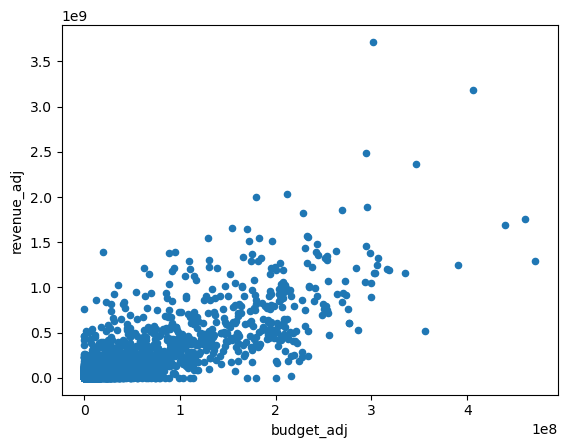

In [173]:
# scatterplot of budget_adj and revenue_adj
tmdb_df_unique.plot.scatter(x='budget_adj',y='revenue_adj')

<AxesSubplot: xlabel='revenue_adj', ylabel='popularity'>

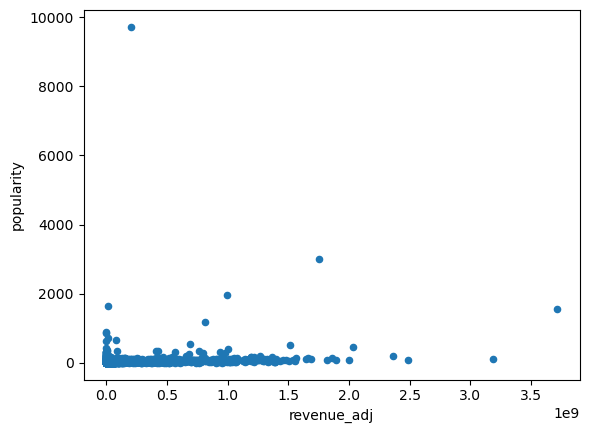

In [176]:
# scatterplot of revenue_adj and popularity
tmdb_df_unique.plot.scatter(x='revenue_adj',y='popularity')

<AxesSubplot: xlabel='revenue_adj', ylabel='vote_average'>

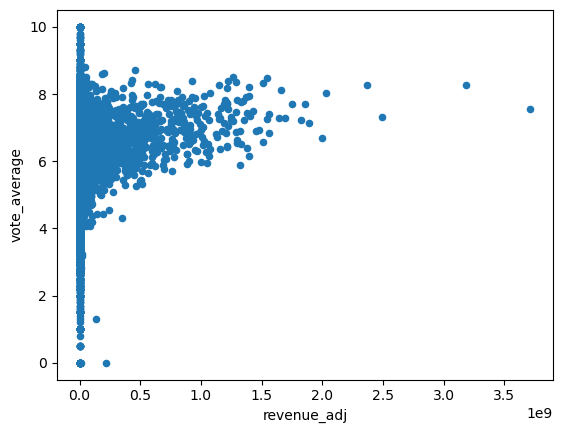

In [177]:
# scatterplot of revenue_adj and vote_average
tmdb_df_unique.plot.scatter(x='revenue_adj',y='vote_average')

In [175]:
# multiple regression of revenue_adj (IV) as predicted by popularity, budget_adj, vote_average